# Perkenalan

- Nama: Muhamad Afif Thufail
- Batch: FTDS Batch 10
- Dataset: Indonesian News Title

- Objective: Memprediksi kategori berita dalam bahasa Indonesia
- Note: Model ini hanya dapat memprediksi satu kelas/kategori saja (MultiClass single lable).

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
from gensim.corpora import WikiCorpus
import multiprocessing
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from tensorflow import keras

In [ ]:
! pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 6.2 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Loading

In [ ]:
data = pd.read_csv('indonesian-news-title.csv')

In [ ]:
data.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


Terdapat 4 kolom dari dataset tersebut yaitu tangga, URL, Judul Berita dan Kategori Berita. Karena yang digunakan hanya Judul Berita dan Kategori berita sebagai target, maka kolom Tanggal dan URL di buang

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      91017 non-null  object
 1   url       91017 non-null  object
 2   title     91017 non-null  object
 3   category  91017 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


Terdapat 91017 data atau judul berita pada dataset tersebut

In [ ]:
data.drop(columns=['date','url'],inplace=True)

In [ ]:
data.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [ ]:
data.isnull().sum()

title       0
category    0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.isnull().sum()

title       0
category    0
dtype: int64

Tidak ada missing values pada dataset tersebut.

# Exploratory Data Analaysis

In [ ]:
target = data.category.value_counts()
target

news       32360
hot        16330
finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: category, dtype: int64

Terdapat 9 kategori berita pada dataset tersebut

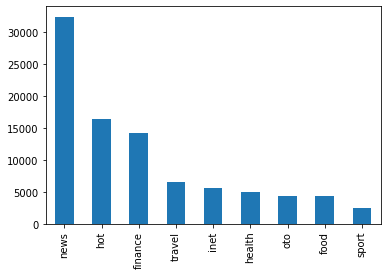

In [ ]:
target.plot(kind='bar')

Kategori News memiliki jumlah judul berita paling banyak dan kategori sport memiliki jumlah judul berita paling sedikit

In [ ]:
news = data[data['category']=='news']
news

,title,category
45372,2 Pengedar Uang Palsu di Palu Ditangkap Saat B...,news
45373,Pinta Maaf Elite 'Partai Matahari' Gegara Kait...,news
45374,"Cegah Corona Meluas, Jam Malam di Sigi Sulteng...",news
45375,"Antrean Bandara Soetta Padat, 106 Penumpang Tu...",news
45376,"Unggul Voting PKPU, Pemegang Saham Mayoritas K...",news
...,...,...
77727,Alexander: Sprindik Kasus Suap Bupati Sidoarjo...,news
77728,KPK Akan Minta Izin Dewas untuk Penggeledahan-...,news
77729,"Gempa M 4,7 Terjadi di Tambolaka NTT",news
77730,KPK Sebut Internal Pemkab Jadi Informan di Kas...,news


Kategori news berisi berita tentang politik, bencana alam, dan berita biasa lainnya.

In [ ]:
finance = data[data['category']=='finance']
finance

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...
14163,Penjelasan Lengkap Soal 'Libur' Bayar Cicilan ...,finance
14164,"Pak Jokowi BLT Jangan Salah Sasaran, Ini Merek...",finance
14165,"Sakit Itu Mahal, Sehat Itu Murah (2)",finance
14166,"Ingat Tidak Perlu Mudik, Lebaran Video Call Saja",finance


Berita finance berisi mengenai sesuatu yang berkaitan dengan ekonomi dan keuangan

In [ ]:
hot = data[data['category']=='hot']
hot

,title,category
23402,Sahabat Ceritakan Awal Mula Didi Kempot Tampil...,hot
23403,Jangan Genit! Nora Alexandra Cemburu Lihat Net...,hot
23404,"Bangun Masjid, Atta: Perlukah Diposting di You...",hot
23405,"Nyanyikan Lagu 'Layang Kangen' dan 'Cidro', Pu...",hot
23406,"Pandemi Corona, Barbie Kumalasari Kangen dan K...",hot
...,...,...
39727,"Sosok Artis Jerry Lawalata, Lama Tak Muncul ki...",hot
39728,"Diduga Terjerat Narkoba, Jerry Lawalata Ditang...",hot
39729,"Ogah Bikin Album, Rhoma Irama: Mubazir",hot
39730,Pesona Amanda Manopo dan Amanda Caesa Bikin Bi...,hot


Kategori hot berisi berita mengenai selebritis

In [ ]:
travel = data[data['category']=='travel']
travel

,title,category
84551,Italia Bakal Punya Tempat Pemakaman Islam Pertama,travel
84552,Mau Wisata ke Pantai Pangandaran? Ini Persyara...,travel
84553,Penumpang Protes Tak Ada Jaga Jarak di Pesawat...,travel
84554,Milenial Mau ke Australia? Simak Info Belanja ...,travel
84555,Yogya Segera Gelar Simulasi dan Uji Coba SOP d...,travel
...,...,...
91012,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel


Kategori travel berkaitan dengan pariwisata atau travelling

In [ ]:
inet = data[data['category']=='inet']
inet

,title,category
39732,Google Sampai Kekurangan Laptop Karena Work Fr...,inet
39733,APU AMD Renoir Bakal Punya 8 Core?,inet
39734,Peran Telkom Atasi COVID-19: Sediakan Layanan ...,inet
39735,"Viral Surat Bebas COVID-19 Dijual Online, Ini ...",inet
39736,"Data Mitra GoFood Aman, Pakar IT: Waspadai Kej...",inet
...,...,...
45367,Fitur Baru WhatsApp yang Segera Hadir dan Patu...,inet
45368,"Kawah Asteroid Tertua Ditemukan, Usianya 2,2 M...",inet
45369,Indosat Dukung BRTI Evaluasi SOP Pergantian SI...,inet
45370,"MU Tumbang, #OleOut Bergaung Kencang",inet


Kategori Inet lebih ke internet dan teknologi

In [ ]:
health = data[data['category']=='health']
health

,title,category
18483,"Pemuda Sulsel Curi CD dan Bra Emak-emak, Terma...",health
18484,"Pemuda di Sulsel Curi Bra dan 'CD' Emak-emak, ...",health
18485,Netizen Sebut Health Alert Card Ribet dan Tak ...,health
18486,Apa yang Bikin Seks Terasa Menyenangkan? Riset...,health
18487,Studi Mengatakan COVID-19 Tidak Menular ke Janin,health
...,...,...
23397,Tips Aman Berbelanja Agar Tak Tertular Virus C...,health
23398,Mungkinkah Virus Corona Aktif Lagi Setelah Pas...,health
23399,Kenali Berbagai Pemicu Stres Saat Bekerja dari...,health
23400,"Jumlah Pasien Corona Tembus 2 Juta, Terbanyak ...",health


Kategori Health berkaitan dengan kesehatan

In [ ]:
oto = data[data['category']=='oto']
oto

,title,category
77732,"Elegan dan Misterius, Ini Wujud New MINI Count...",oto
77733,Seluruh Moda Transportasi Boleh Beroperasi Lag...,oto
77734,"Tokcer, Penjualan MINI Naik 16% di Tengah Pand...",oto
77735,12 Hari Larangan Mudik: Polda Metro Putar Bali...,oto
77736,Apa Kabar Denda Rp 100 Juta untuk Pemudik Naka...,oto
...,...,...
82110,Terpopuler: Trio Mobil China Dobrak Dominasi J...,oto
82111,Mobil Hybrid yang Pernah Ditumpangi Anies Basw...,oto
82112,"Selain Komentari MotoGP, Matteo Jual Motor yan...",oto
82113,"Corona, Aksi Kebut-kebutan Dominic Toretto di ...",oto


Kategori oto berkaitan dengan automotif

In [ ]:
food = data[data['category']=='food']
food

,title,category
14168,Galeri Foto Kocak! Begini Jadinya Kalau 'Oppa'...,food
14169,Galeri Foto Niat Abis! Netizen Luangkan Waktu ...,food
14170,Keseruan Putri Delina Siapkan Menu Sahur untuk...,food
14171,"Yuk, Intip! Aksi Orang Korea Bikin Sambal Ulek...",food
14172,Resep Tumis Ayam dan Tofu yang Sedap Untuk Sahur,food
...,...,...
18478,Wanita Ini Diprotes Gara-gara Cuci Ayam Pakai ...,food
18479,7 Bahan Makanan Ini Bisa Gantikan Telur dalam ...,food
18480,"Spiderman Kirim Sayuran hingga Donat, Aksi Keb...",food
18481,Begini Persiapan Orang Indonesia yang Jalani P...,food


Kategori food berkaitan dengan makanan dan minuman

In [ ]:
sport = data[data['category']=='sport']
sport

,title,category
82115,Foto: Pemain Voli Pantai Tercantik di Dunia,sport
82116,"Gaji Pelatnas Tak Ada, Triady Fauzi Andalkan U...",sport
82117,Perenang Nasional Menikah di Tengah Wabah Coro...,sport
82118,Merasakan Perkembangan Garuda Select,sport
82119,Cerita Perenang Nasional Menikah di Tengah Wab...,sport
...,...,...
84546,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai...",sport
84547,Video Stadion Sepakbola di Dunia Beralih Fungs...,sport
84548,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua...",sport
84549,"Wimbledon 2020 Terancam Batal, Panitia Rapat D...",sport


Kategori sport berkaitan dengan olahraga

# Data Preprocessing

In [ ]:
data['category'] = data['category'].map({'news':0,
                               'hot': 1,
                               'finance': 2,
                               'travel': 3,
                               'inet': 4,
                               'health': 5,
                               'oto': 6,
                               'food': 7,
                               'sport': 8})

Kolom kategori atau target dijadikan numerikal agar dapat terbaca oleh model RNN

In [ ]:
data.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,2
1,BNI Digitalkan BNI Java Jazz 2020,2
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",2
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,2
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,2


### Pembuatan data Inference

In [ ]:
data_inf = data.sample(10, random_state=30)
data_inf

,title,category
58394,Said Iqbal Nilai Pembahasan Omnibus Law Tenaga...,0
15000,5 Scrub Alami dari Bahan Makanan untuk Mencera...,7
51023,MenPAN-RB Beri Penghargaan ke Polda Metro atas...,0
5278,Pengusaha-Pemerintah Sinergi Jaga Ekonomi di M...,2
41053,"Akhirnya, Zoom Tingkatkan Keamanan di Versi 5.0",4
74575,Ikut Donasi Bantu Atasi COVID-19 dari Rumah de...,0
70899,Jalur Alternatif ke Cianjur di Tanjungsari Bog...,0
69587,Jokowi Puji Peningkatan Angka Kelulusan Keluar...,0
55489,"Kisahnya Masuk TNI Viral, Yusuf Wonda Ingin Ja...",0
89821,Flamingo Berduyun-duyun Terbang ke Mumbai Saat...,3


Data Inference dibuat untuk nantinya akan diprediksi oleh model 

In [ ]:
data = data.drop(data_inf.index)
data 

,title,category
0,Kemnaker Awasi TKA di Meikarta,2
1,BNI Digitalkan BNI Java Jazz 2020,2
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",2
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,2
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,2
...,...,...
91012,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",3
91013,Foto: Bali & 9 Destinasi Paling Instagramable ...,3
91014,Game Bikin Turis Ini Liburan ke Jepang untuk.....,3
91015,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",3


In [ ]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Train Test Split

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.15, random_state=77, stratify=data.category)
train_data, val_data = train_test_split (train_data, test_size=0.1, random_state=77, stratify=train_data.category)

Data train dan data test di split dengan test size untuk data test sebesar 15%. Data train dan data validation juga di split dengan test size untuk data validation sebesar 10%. Keduanya juga diberikan stratify agar persentase targetnya tetap seimbang antara data test dan data validation.

In [ ]:
X_train,y_train = train_data.title, train_data.category
X_val,y_val = val_data.title, val_data.category
X_test,y_test = test_data.title, test_data.category



In [ ]:
y_train

43137    4
2704     2
3993     2
76081    0
33295    1
        ..
73771    0
64101    0
9345     2
75084    0
8420     2
Name: category, Length: 69619, dtype: int64

In [ ]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

Target dilakukan encoding agar menjadi setara.

In [ ]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# buat fungsi stem untuk series
def stem_sent(sent):
  output   = stemmer.stem(sent)
  return output

X_train = X_train.apply(stem_sent)
X_val = X_val.apply(stem_sent)
X_test = X_test.apply(stem_sent)

Stemmer yang digunakan yaitu pysastrawi dapat mengurangi kata-kata infleksi dalam Bahasa Indonesia ke bentuk dasarnya.

In [ ]:
X_train

43137              raya haribumi netizen cepat sembuh bumi
2704       teror corona rajalela ekonomi dunia bisa lumpuh
3993     usai psbb ada new normal usaha jangan buka lan...
76081    gatot ajak makmur masjid di tengah corona komi...
33295       perspektif dil dalam film milea suara dari dil
                               ...                        
73771    pria sakit misterius hingga wajah seperti lele...
64101    tahan 3 sangka provokator blokir jalan di domp...
9345            jalan panjang duel panas luhut-rizal ramli
75084    tampak mobil innova yang sempat dikejar-diteri...
8420                 pasar pramuka masih serbu buru masker
Name: title, Length: 69619, dtype: object

In [ ]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

9

In [ ]:
max_vocab_length = 3500
max_length = 9

text_vectorization = TextVectorization(max_tokens= max_vocab_length,
                                       standardize='lower_and_strip_punctuation',
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length,
                                       input_shape=(1,))

In [ ]:
text_vectorization.adapt(X_train)

Dilakukan Text Vectorization agar kata-kata diterjemahkan menjadi sekumpulan angka yang dimengerti oleh mesin.

In [ ]:
X_train

43137              raya haribumi netizen cepat sembuh bumi
2704       teror corona rajalela ekonomi dunia bisa lumpuh
3993     usai psbb ada new normal usaha jangan buka lan...
76081    gatot ajak makmur masjid di tengah corona komi...
33295       perspektif dil dalam film milea suara dari dil
                               ...                        
73771    pria sakit misterius hingga wajah seperti lele...
64101    tahan 3 sangka provokator blokir jalan di domp...
9345            jalan panjang duel panas luhut-rizal ramli
75084    tampak mobil innova yang sempat dikejar-diteri...
8420                 pasar pramuka masih serbu buru masker
Name: title, Length: 69619, dtype: object

In [ ]:
from tensorflow.keras.layers import Embedding

embedding =Embedding(input_dim=max_vocab_length,
                     output_dim=128,
                     embeddings_initializer='uniform',
                     input_length=max_length
                     )

Embedding dilakukan untuk memetakan kata  yang sama atau mirip untuk memiliki representasi yang sama atau saling berdekatan.

# Model Definition, Training, and Evaluation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),

]

Digunakan callbacks, agar proses training dapat dihentikan jika nilai loss pada data validation meningkat sebanyak 5 kali

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model, Sequential
from keras.layers import Dropout

model= Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(7, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist_1 = model.fit(X_train,
                         y_train_ohe,epochs=40, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/40
2176/2176 [==============================] - 13s 5ms/step - loss: 1.1061 - accuracy: 0.6426 - val_loss: 0.7437 - val_accuracy: 0.7724
Epoch 2/40
2176/2176 [==============================] - 10s 4ms/step - loss: 0.7993 - accuracy: 0.7427 - val_loss: 0.6726 - val_accuracy: 0.7955
Epoch 3/40
2176/2176 [==============================] - 10s 5ms/step - loss: 0.7393 - accuracy: 0.7613 - val_loss: 0.6454 - val_accuracy: 0.8055
Epoch 4/40
2176/2176 [==============================] - 10s 5ms/step - loss: 0.7047 - accuracy: 0.7712 - val_loss: 0.6276 - val_accuracy: 0.8089
Epoch 5/40
2176/2176 [==============================] - 10s 5ms/step - loss: 0.6776 - accuracy: 0.7776 - val_loss: 0.6229 - val_accuracy: 0.8113
Epoch 6/40
2176/2176 [==============================] - 10s 5ms/step - loss: 0.6676 - accuracy: 0.7823 - val_loss: 0.6165 - val_accuracy: 0.8109
Epoch 7/40
2176/2176 [==============================] - 10s 4ms/step - loss: 0.6520 - accuracy: 0.7862 - val_loss: 0.6152 - val_ac

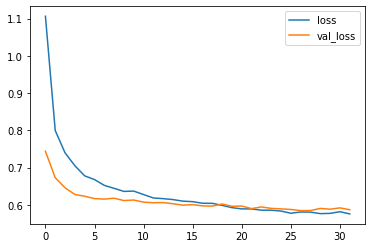

In [ ]:
hist_1_df = pd.DataFrame(hist_1.history)
hist_1_df[['loss', 'val_loss']].plot();

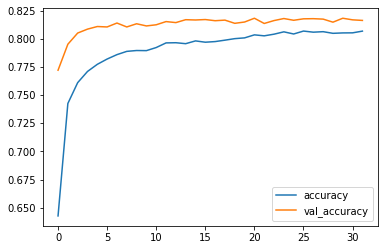

In [ ]:
hist_1_df[['accuracy', 'val_accuracy']].plot();

Dari garfik diatas, nilai loss dan train cenderung berdekatan yang artinya model tersebut good-fit.

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4853
           1       0.82      0.89      0.85      2450
           2       0.81      0.82      0.82      2125
           3       0.77      0.69      0.73       970
           4       0.77      0.72      0.74       846
           5       0.70      0.59      0.64       738
           6       0.78      0.69      0.73       658
           7       0.80      0.80      0.80       647
           8       0.84      0.65      0.74       365

    accuracy                           0.82     13652
   macro avg       0.79      0.75      0.77     13652
weighted avg       0.82      0.82      0.82     13652



Dengan menggunakan model RNN didapatkan nilai akurasi sebesar 82%.

Pemodelan sudah dilakukan berkali-kali, hasil model inilah yang paling good-fit pada nilai loss antara data train dan data Validation.

### Model LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout

model_2 = Sequential()
model_2.add(text_vectorization)
model_2.add(embedding)
model_2.add(LSTM(5))
model_2.add(Dropout(0.3))
model_2.add(Dense(9, activation='softmax'))


model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist_2 = model_2.fit(X_train,
                         y_train_ohe,
                         epochs=40, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/40
2176/2176 [==============================] - 18s 6ms/step - loss: 1.1123 - accuracy: 0.6423 - val_loss: 0.8304 - val_accuracy: 0.7497
Epoch 2/40
2176/2176 [==============================] - 14s 6ms/step - loss: 0.8401 - accuracy: 0.7258 - val_loss: 0.6899 - val_accuracy: 0.7967
Epoch 3/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7597 - accuracy: 0.7516 - val_loss: 0.6503 - val_accuracy: 0.8011
Epoch 4/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7279 - accuracy: 0.7581 - val_loss: 0.6425 - val_accuracy: 0.8031
Epoch 5/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7111 - accuracy: 0.7645 - val_loss: 0.6419 - val_accuracy: 0.8013
Epoch 6/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.6992 - accuracy: 0.7665 - val_loss: 0.6329 - val_accuracy: 0.8073
Epoch 7/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.6872 - accuracy: 0.7686 - val_loss: 0.6320 - val_ac

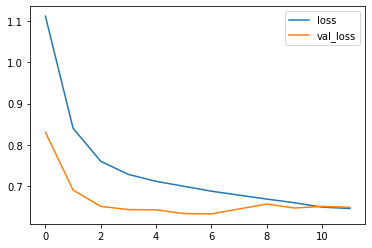

In [ ]:
hist_2_df = pd.DataFrame(hist_2.history)
hist_2_df[['loss', 'val_loss']].plot();

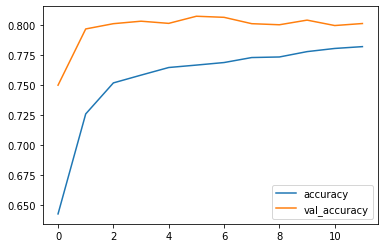

In [ ]:
hist_2_df[['accuracy', 'val_accuracy']].plot();

Nilai loss antara data train dan validation berdekatan, tetapi nilai akurasinya lebih berjauhan antara data train dan validation dari model sebelumnya. Tetapi model ini masih dapat dikatakan good-fit.

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4853
           1       0.82      0.86      0.84      2450
           2       0.79      0.82      0.80      2125
           3       0.68      0.70      0.69       970
           4       0.72      0.68      0.70       846
           5       0.68      0.54      0.60       738
           6       0.76      0.64      0.70       658
           7       0.83      0.76      0.79       647
           8       0.86      0.62      0.72       365

    accuracy                           0.80     13652
   macro avg       0.78      0.72      0.75     13652
weighted avg       0.80      0.80      0.80     13652



Pada pemodelan menggunakan LSTM didapatkan nilai akurasi sebesar 80%. Tetapi tidak disarankan menggunakan LSTM karena menunggunya sangat lama.

Pemodelan sudah dilakukan berkali-kali, hasil model inilah yang paling good-fit pada nilai loss antara data train dan data Validation.

### GRU

In [ ]:
from tensorflow.keras.layers import GRU

model_3 = Sequential()
model_3.add(text_vectorization)
model_3.add(embedding)
model_3.add(GRU(5))
model_3.add(Dropout(0.3))
model_3.add(Dense(9, activation='softmax'))


model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train,
                         y_train_ohe,
                         epochs=40, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/40
2176/2176 [==============================] - 15s 6ms/step - loss: 1.1390 - accuracy: 0.6358 - val_loss: 0.8083 - val_accuracy: 0.7558
Epoch 2/40
2176/2176 [==============================] - 12s 6ms/step - loss: 0.8541 - accuracy: 0.7226 - val_loss: 0.7319 - val_accuracy: 0.7884
Epoch 3/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7962 - accuracy: 0.7394 - val_loss: 0.7085 - val_accuracy: 0.7883
Epoch 4/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7671 - accuracy: 0.7479 - val_loss: 0.7070 - val_accuracy: 0.7916
Epoch 5/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7513 - accuracy: 0.7518 - val_loss: 0.6980 - val_accuracy: 0.7930
Epoch 6/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7392 - accuracy: 0.7547 - val_loss: 0.6924 - val_accuracy: 0.7951
Epoch 7/40
2176/2176 [==============================] - 13s 6ms/step - loss: 0.7277 - accuracy: 0.7586 - val_loss: 0.6945 - val_ac

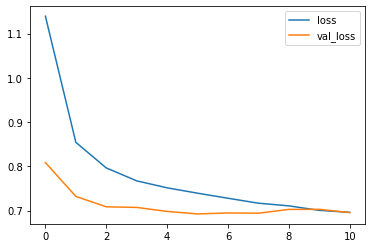

In [ ]:
hist_3_df = pd.DataFrame(hist_3.history)
hist_3_df[['loss', 'val_loss']].plot();

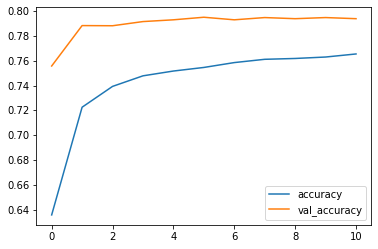

In [ ]:
hist_3_df[['accuracy', 'val_accuracy']].plot();

Nilai loss antara data train dan validation berdekatan, tetapi nilai akurasinya lebih berjauhan antara data train dan validation dari model sebelumnya. Model ini bisa sedikit dikatakan underfit

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_3.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4853
           1       0.79      0.88      0.83      2450
           2       0.81      0.78      0.80      2125
           3       0.71      0.64      0.67       970
           4       0.77      0.65      0.70       846
           5       0.68      0.48      0.56       738
           6       0.76      0.67      0.71       658
           7       0.79      0.72      0.75       647
           8       0.84      0.61      0.71       365

    accuracy                           0.79     13652
   macro avg       0.77      0.70      0.73     13652
weighted avg       0.79      0.79      0.79     13652



Pada pemodelan menggunakan GRU didapatkan nilai akurasi didapatkan sebesar 79%:

Pemodelan sudah dilakukan berkali-kali, hasil model inilah yang paling good-fit pada nilai loss antara data train dan data Validation.

Karena model dengan akurasi tertinggi adalah model pertama atau model RNN, maka model tersebut yang digunakan sebagai pipeline.

### Pipeline

In [ ]:
callbacks_2= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True)
    #ReduceLROnPlateau

]

In [ ]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(10000).batch(64)


#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(64)


#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(64)



#Call Model
model_pipeline= Sequential()
model_pipeline.add(text_vectorization)
model_pipeline.add(embedding)
model_pipeline.add(GlobalAveragePooling1D())
model_pipeline.add(Dense(7, activation='elu'))
model_pipeline.add(Dropout(0.3))
model_pipeline.add(Dense(9, activation='softmax'))

model_pipeline.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist_pipeline = model_pipeline.fit(train_dataset,epochs=40, callbacks=callbacks,
                         validation_data=(val_dataset))

Epoch 1/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.9915 - accuracy: 0.6946 - val_loss: 0.6436 - val_accuracy: 0.8039
Epoch 2/40
1088/1088 [==============================] - 4s 4ms/step - loss: 0.6751 - accuracy: 0.7857 - val_loss: 0.5983 - val_accuracy: 0.8117
Epoch 3/40
1088/1088 [==============================] - 4s 4ms/step - loss: 0.6332 - accuracy: 0.7971 - val_loss: 0.5919 - val_accuracy: 0.8158
Epoch 4/40
1088/1088 [==============================] - 4s 4ms/step - loss: 0.6157 - accuracy: 0.8034 - val_loss: 0.5907 - val_accuracy: 0.8139
Epoch 5/40
1088/1088 [==============================] - 4s 4ms/step - loss: 0.6038 - accuracy: 0.8041 - val_loss: 0.5883 - val_accuracy: 0.8179
Epoch 6/40
1088/1088 [==============================] - 4s 4ms/step - loss: 0.5982 - accuracy: 0.8039 - val_loss: 0.5907 - val_accuracy: 0.8157
Epoch 7/40
1088/1088 [==============================] - 5s 4ms/step - loss: 0.5939 - accuracy: 0.8048 - val_loss: 0.5911 - val_accuracy:

In [ ]:
model_pipeline.save('model_milestone2')

INFO:tensorflow:Assets written to: model_milestone2/assets


Model telah di simpan

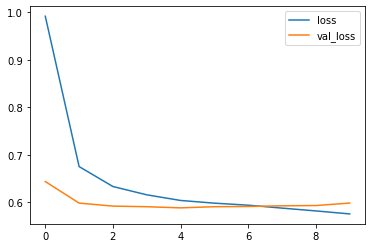

In [ ]:
model_pipeline_df = pd.DataFrame(hist_pipeline.history)
model_pipeline_df[['loss', 'val_loss']].plot();

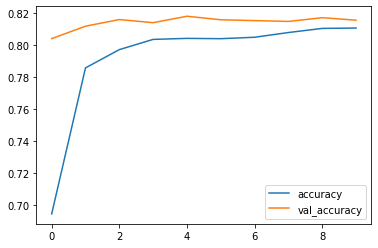

In [ ]:
model_pipeline_df[['accuracy', 'val_accuracy']].plot();

In [ ]:
y_pred = model_pipeline.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4853
           1       0.81      0.90      0.85      2450
           2       0.83      0.81      0.82      2125
           3       0.74      0.71      0.72       970
           4       0.82      0.70      0.75       846
           5       0.71      0.58      0.64       738
           6       0.75      0.72      0.74       658
           7       0.81      0.81      0.81       647
           8       0.85      0.61      0.71       365

    accuracy                           0.82     13652
   macro avg       0.80      0.75      0.77     13652
weighted avg       0.82      0.82      0.82     13652



# Model Inference

In [ ]:
data_inf

,title,category
0,Said Iqbal Nilai Pembahasan Omnibus Law Tenaga...,0
1,5 Scrub Alami dari Bahan Makanan untuk Mencera...,7
2,MenPAN-RB Beri Penghargaan ke Polda Metro atas...,0
3,Pengusaha-Pemerintah Sinergi Jaga Ekonomi di M...,2
4,"Akhirnya, Zoom Tingkatkan Keamanan di Versi 5.0",4
5,Ikut Donasi Bantu Atasi COVID-19 dari Rumah de...,0
6,Jalur Alternatif ke Cianjur di Tanjungsari Bog...,0
7,Jokowi Puji Peningkatan Angka Kelulusan Keluar...,0
8,"Kisahnya Masuk TNI Viral, Yusuf Wonda Ingin Ja...",0
9,Flamingo Berduyun-duyun Terbang ke Mumbai Saat...,3


In [ ]:
load_model = keras.models.load_model("model_milestone2")

model di load kembali untuk digunakan untuk memprediksi data inference

In [ ]:
y_pred_inf = load_model.predict(data_inf['title'])
y_pred_inf

array([[9.99503136e-01, 1.32652394e-06, 5.50094010e-05, 2.61102959e-05,
        7.37988466e-06, 1.69100844e-07, 4.04637016e-04, 1.32782878e-08,
        2.26152383e-06],
       [9.62139368e-02, 1.53791472e-01, 1.41729005e-02, 9.58903879e-02,
        3.86477597e-02, 2.00536743e-01, 2.61975862e-02, 3.50060314e-01,
        2.44889483e-02],
       [9.86492574e-01, 5.21471899e-04, 1.79126346e-05, 1.57592338e-04,
        1.56250790e-05, 6.76823129e-06, 1.01051126e-02, 2.07622929e-06,
        2.68094055e-03],
       [1.18118875e-01, 3.16203460e-02, 7.69573987e-01, 2.58685071e-02,
        2.42885854e-02, 2.70248391e-03, 2.55080592e-02, 4.55519767e-04,
        1.86362781e-03],
       [9.58137272e-04, 1.58284034e-03, 7.43822195e-04, 9.06865986e-04,
        9.88910198e-01, 7.80605114e-05, 3.83421080e-03, 5.30121615e-05,
        2.93275574e-03],
       [2.51340061e-01, 3.03359240e-01, 3.43882330e-02, 2.74835322e-02,
        2.05707163e-01, 1.02976985e-01, 1.81485005e-02, 3.00268084e-02,
        2.6

In [ ]:
y_pred_inf = y_pred_inf.argmax(axis=1)
y_pred_inf

array([0, 7, 0, 2, 4, 1, 0, 0, 0, 3])

In [ ]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Category-Prediction'])
y_pred_inf

,Category-Prediction
0,0
1,7
2,0
3,2
4,4
5,1
6,0
7,0
8,0
9,3


In [ ]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,title,category,Category-Prediction
0,Said Iqbal Nilai Pembahasan Omnibus Law Tenaga...,0,0
1,5 Scrub Alami dari Bahan Makanan untuk Mencera...,7,7
2,MenPAN-RB Beri Penghargaan ke Polda Metro atas...,0,0
3,Pengusaha-Pemerintah Sinergi Jaga Ekonomi di M...,2,2
4,"Akhirnya, Zoom Tingkatkan Keamanan di Versi 5.0",4,4
5,Ikut Donasi Bantu Atasi COVID-19 dari Rumah de...,0,1
6,Jalur Alternatif ke Cianjur di Tanjungsari Bog...,0,0
7,Jokowi Puji Peningkatan Angka Kelulusan Keluar...,0,0
8,"Kisahnya Masuk TNI Viral, Yusuf Wonda Ingin Ja...",0,0
9,Flamingo Berduyun-duyun Terbang ke Mumbai Saat...,3,3


Model dapat memprediksi 9 dari 10 data inference dengan benar.

In [ ]:
!zip -r /content/Model.zip /content/model_milestone2


  adding: content/model_milestone2/ (stored 0%)
  adding: content/model_milestone2/assets/ (stored 0%)
  adding: content/model_milestone2/keras_metadata.pb (deflated 86%)
  adding: content/model_milestone2/saved_model.pb (deflated 83%)
  adding: content/model_milestone2/variables/ (stored 0%)
  adding: content/model_milestone2/variables/variables.index (deflated 58%)
  adding: content/model_milestone2/variables/variables.data-00000-of-00001 (deflated 7%)


In [ ]:
from google.colab import files
files.download('/content/Model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model di download

# Pengambilan Keputusan

- Model dibuat untuk memprediksi kategori pada judul berita menggunakan Natural Language Processing (NLP).
- Terdapat 9 kategori berita pada dataset tersebut.
- Dilakukan preprocessing menggunakan stemmer berupa pysastrawi, TextCextorization, dan Word Embedding.
- Digunakan Callback agar proses training dapat berhenti jika nilai loss pada data validation terus naik.
- Dilakukan 3 pemodelan menggunakan RNN biasa (Global Average Pooling), LSTM, dan GRU.
- Hasilnya model menggunakan RNN biasa didapatkan nilai akurasi tertinggi yaitu 82%.
- Selain itu dari grafik Val-loss dan akurasi pada data train dan data validation, model RNN biasa bisa dikatan model yang paling good-fit.
- Model terbaik dijadikan pipeline dan disimpan untuk nantinya digunakan sebagai deploy.